## Mathematical Optimization Series

# Part 1: Motivation and primative methods

In this brief post we motivate the study of **mathematical optimization**, the collection of methods built on basic calculus by which we determine proper parameters for machine learning / deep learning models. When viewed geometrically the pursuit of proper parameters is also the search for the lowest point - or minimum - of a machine learning model's associated cost function.  

Afterwards we describe two naive methods of mathematical optimization - random evaluation and random search.  Both approaches are extremely simple, but both have fundamental flaws that make them unfit for most modern deep learning / machine learing applications.  We discuss them primarily because they allow us to introduce a number of key concepts - concepts shared by almost all effective mathematical optimization algorithms - in a relatively simple enviroment, divorced from the complications involved with more sophisticated algorithms.  

In [2]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np
from matplotlib import gridspec
import math
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1. Mathematical optimization and machine learning / deep learning

Every machine learning / deep learning learning problem has parameters that must be tuned properly to ensure optimal learning. For example, there are two parameters that must be properly tuned in the case of a simple linear regression - when fitting a line to a scatter of data: the slope and intercept of the linear model.  

These two parameters are tuned by forming what is called a *cost function* or *loss function*.  This is a continuous function in both parameters - that measures how well the linear model fits a dataset given a value for its slope and intercept. The proper tuning of these parameters via the cost function corresponds geometrically to finding the values for the parameters that make the cost function as small as possible or, in other words, *minimize* the cost function.  The image below - taken from [[1]]((#references)) -  illustrates how choosing a set of parameters higher on the cost function results in a corresponding line fit that is poorer than the one corresponding to parameters at the lowest point on the cost surface.

<img src="../../mlrefined_images/math_optimization_images/bigpicture_regression_optimization.png" width=500 height=250/>

This same idea holds true for regression with higher dimensional input, as well as classification where we must properly tune parameters to *separate* classes of data.
Again, the parameters minimizing an associated cost function provide the best classification result. This is illustrated for classification below - again taken from [[1]](#references).

<img src="../../mlrefined_images/math_optimization_images/bigpicture_classification_optimization.png" width=500 height=250/>

The tuning of these parameters require the *minimization of a cost function* can be formally written as follows.  For a generic function $g(\mathbf{w})$ taking in a general $N$ dimensional input $\mathbf{w}$ the problem of finding the particular point $\mathbf{v}$ where $g$ attains its smallest value is written formally as

\begin{equation}
\underset{\mathbf{w}}{\mbox{minimize}}\,\,\,\,g\left(\mathbf{w}\right)
\end{equation}

As detailed in our series on the *vital elements of calculus*, the first order optimality condition characterizes solutions to this problem.  However becaue these conditions can very rarely be solved 'by hand' we must rely on algorithmic techniques for finding function minima (or at the very least finding points close to them).  In this series posts we examine many algorithmic methods of *mathematical optimization*, which aim to do just this.

> The tools of mathematical optimization are designed to minimize cost functions.  When applied to learning problems this corresponds to properly tuning the parameters of a learning model.

Mathematical optimization is the workhorse of machine learning / deep learning, playing a role in virtually every learning problem.  In this series of posts we describe the major concepts and algorithms of mathematical optimization used in practice today for machine learning / deep learning problems.

# 2.  Naive evaluation 

In this Section we describe the simplest method for minimizing a function - called naive evaluation.  This is an idea that is so simple many might consider it trivial, but it is perhaps the first naive computational way one would try to uncover the global minima of an arbitrary function.

## 2.1  Uniform versus random evaluation

To determine the smallest point of a function taking in one or two inputs we - as humans - can simply draw the function and determine 'by eye' where the smallest point lies.  We can  mimic this visual approach by simply evaluating a function over a large number of its input points and taking the smallest result.  This approach - and in particular this approach when choosing these input points at random - is called *naive evaluation*.  

There are generally speaking two ways of performing this evaluation - *uniformly* over an evenly spaced grid, or picking points at *random* in the input space - which we describe via example below.  

#### <span style="color:#a50e3e;">Example 1. </span> Evaluating a quadratic to determine its minimum

Here we illustrate two sampling methods for finding the global minimum of simple 2-d and 3-d quadratic functions

\begin{array}
\
g(w) = w^2 + 0.2\\
g(w_1,w_2) = w_1^2 + w_2^2 + 0.2
\end{array}

The former has global minimum at $w = 0$, and the latter $(w_1,w_2) = (0,0)$.  In the top two panels we illustrate how to *evenly sample* the input of each function - taking 4 points for the 2-d function and 16 (to make a $4\times 4$ grid) for the 3-d version - at even increments (shown in blue).  The corresponding evaluations are then shown in green on the functions themsevles.  

In the bottom two panels we randomly sample (uniformly at random on the interval $[-1,1]$ in each input axis) the same number of input points - 4 points for the 2-d function and 16 for the 3-d version.  Again the input points themselves are shown in blue, with the corresponding evaluations shown in green. 

<IPython.core.display.Javascript object>


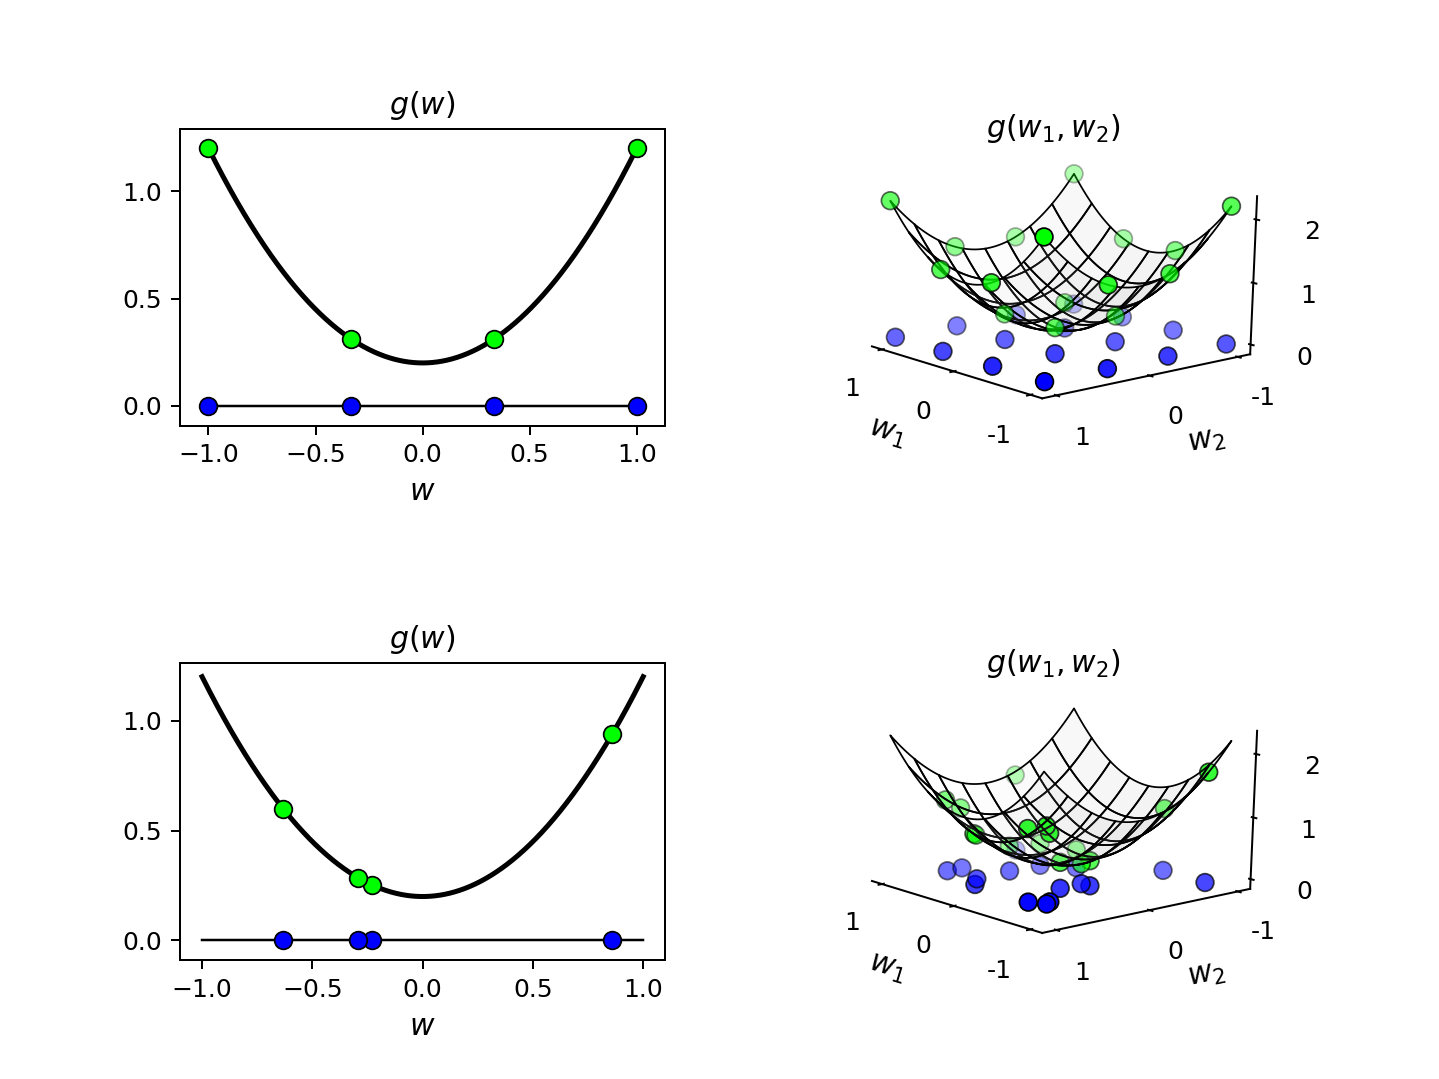

In [3]:
# define function
func = lambda w: np.dot((w-0).T,(w-0)) + 0.2
num_samples = 4
view = [20,140]

# plot 2d and 3d version, with even grid and randomly selected points
optlib.random_method_experiments.double_plot(func,num_samples,view = view)

We can see in the 2-d version in the bottom left panel that by randomly sampling we were acheive a slightly lower point than when sampling evenly.  Instead of covering the space evenly - where we could miss a global minimum as displayed in the example below - by sampling randomly with the same number of points we at least have a chance of stumbling closer it.  

By using enough samples - either in a even grid or randomly -  we could certainly find an input very close to the true global minimum at $w = 0$.  For example if we run this experiment again using 20 samples for the 2-d quadratic, and 400 samples for the 3-d quadratic (so that we are sampling with a $20\times 20$ grid in the case of even sampling), using either approach we are able to find either the global minimum or a point very close to it.

<IPython.core.display.Javascript object>


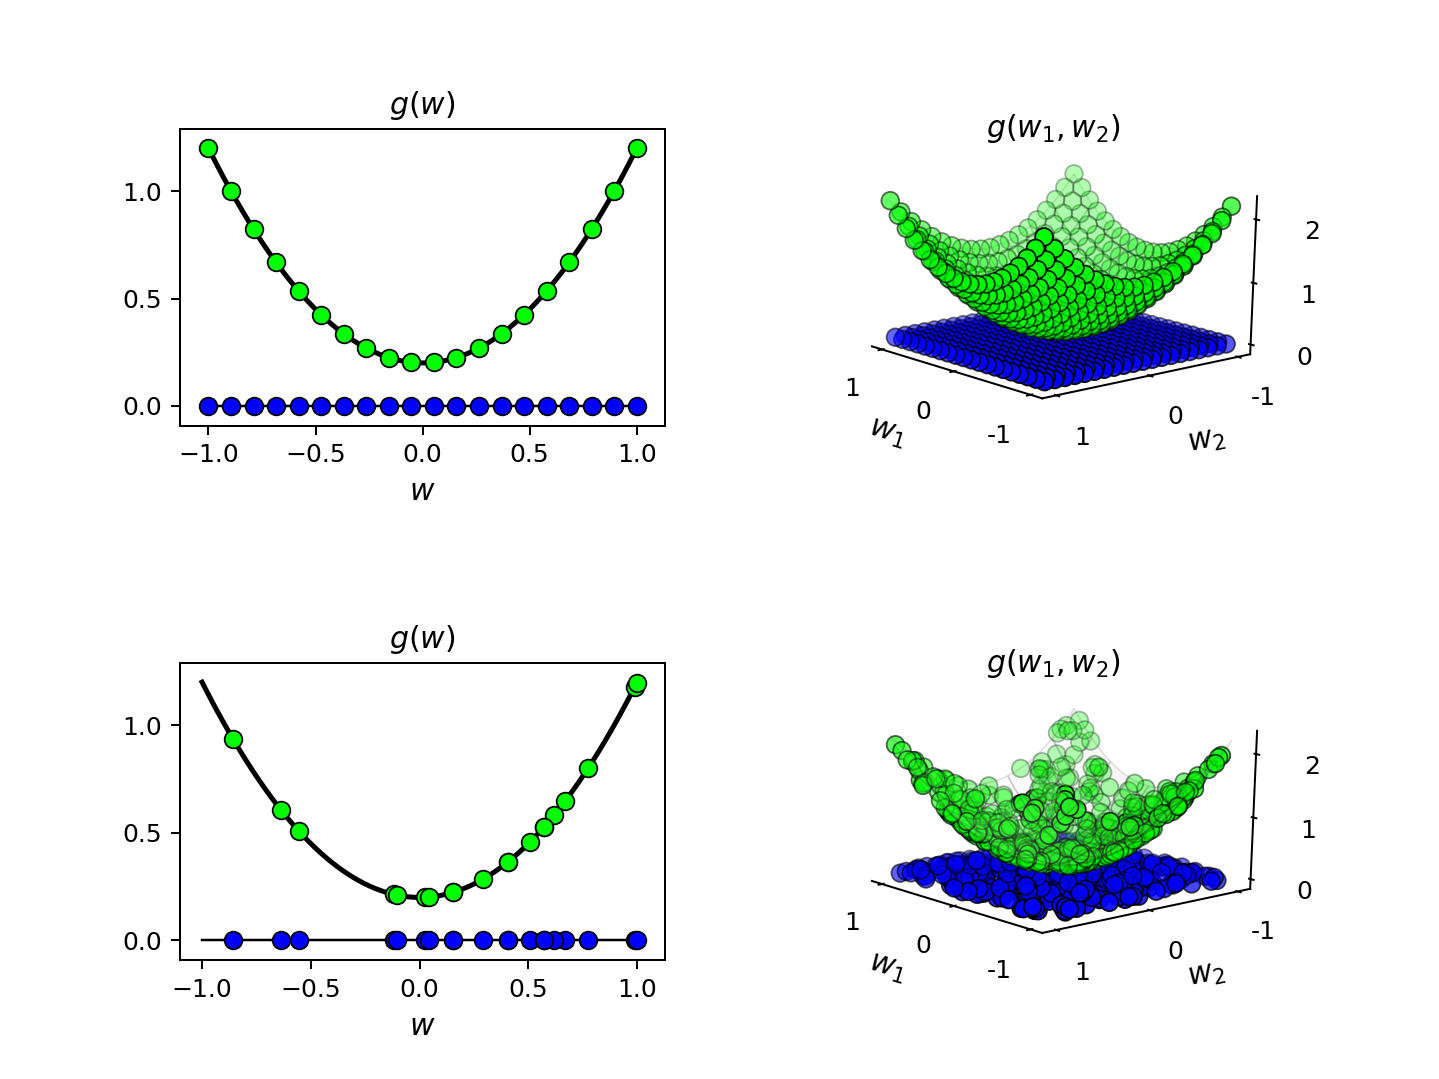

In [3]:
# define function
func = lambda w: np.dot(w.T,w) + 0.2
num_samples = 20
view = [20,140]

# plot 2d and 3d version, with even grid and randomly selected points
optlib.random_method_experiments.double_plot(func,num_samples,view = view)

## 2.2  The curse of dimensionality and the method of naive evaluation

We all live in a world with three spatial dimensions. As such we have evolved to have a good intuition/understanding of three-dimensional problems. Additionally things get considerably easier when we go back to two dimensions, and extremely easier when we go all the way back to the one dimensional space: a simple line. This trend is not good news considering that in machine learning, we usually have to change course and study problems in dimensions much larger than three - sometimes in hundreds of millions or even billions. The notion that analysis of problems in high dimensional spaces gets rapidly worse as we increase dimensionality is generally referred to as the curse of dimensionality, which has undesired consequences in many contexts within machine learning. In our current instance the curse of dimensionality renders the naive evaluation method of finding a function's minimum all but useless for functions of even reasonably small input dimension, as we discuss below.   

Recall that with naive evaluation, we take sample points from the input space of the problem, evaluate the function only at these samples, and keep the one giving the smallest function evaluation. Sampling the input space can be done randomly or in a uniform fashion. Let's first consider the latter case in one dimension where, as shown in the figure below (left panel), the consecutive samples are apart from each other by a distance of $d$. The distance $d$ here is such that we end up with 3 samples per unit interval in this case. Keeping $d$ fixed and moving from one dimension to two (middle panel) and three (right panel) dimensions, we sample along each dimension with the same frequency as we did in one dimension, resulting in a total of 9 samples per unit area and 27 samples per unit volume, respectively. This exponential growth in the number of samples/evaluations is hugely problematic when dealing with higher-dimensional spaces than $N=3$ dimensions: to maintain even this coarse sampling we would need $3^N$ samples in a general $N$ dimensional space.  More generally, if we want to produce a grid with $P$ points along each input dimension we would need to produce $P^D$ samples - which is impossible to do for even small $N$ like e.g., $N = 100$.

<img src="../../mlrefined_images/math_optimization_images/curse_1.png" width=600 height=250/>

Note that this issue remains regardless of whether we take samples regularly (as we did above) or randomly, even though by sampling randomly with a smaller number of points we still have a chance of stumbling onto smaller evaluations of a function. To see why this iis the case let us fix the the total number of randomly sample points to a fixed value, say 10, and look at how well they tend to distribute over an input space as we increase its dimension.  From left to right in the figure below we see one instance of how 10 points can be randomly selected in $N = 1$, $N = 2$, and $N = 3$ dimensional space respectively.  Once again we are inhibited by the curse of dimensionality.  As we increase the dimension of the input space the the average number of samples per unit hypercube drops exponentially, leaving many regions of the space without a single sample (or corresponding evaluation).  Hence if a function's global minimum lies in one of these empty spaces, we will never have access to even the points nearby it. 

<img src="../../mlrefined_images/math_optimization_images/curse_2.png" width=600 height=250/>

#### <span style="color:#a50e3e;">Example 2. </span> Evaluating a quadratic as its dimension increases

In this experiment we verify the *curse of dimensionality* issue associated with the use of randomly sampled points for naive evaluation for the simple quadratic function

$$
g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}
$$

whose minimum is always $g(\mathbf{0}_{N\times 1}) = 0$ regardless of the input dimension $N$.

In this experiment we create a range of these quadratics for input dimension $N=1$ to $N = 100$.  We sample the input space of each quadratic $10,000$ times randomly and uniformly on the hypercube $[-1,1]\times [-1,1] \times \cdots \times [-1,1]$ (this hypercube has $N$ sides).  The printout below shows the *minimum* value attained for each dimensional quadratic after $100$, $1,000$, and $10,000$ samples.  As we can see in the plot, the minimum value attained even after $10,000$ random samples increases substantially as the dimension of the quadratic increases - all due to the curse of dimensionality.

<IPython.core.display.Javascript object>


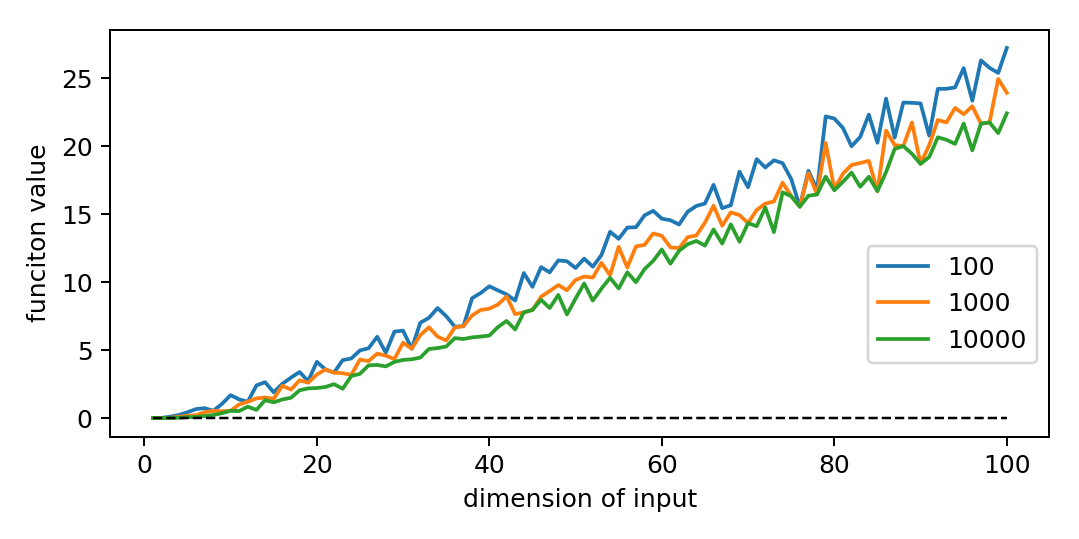

In [4]:
# run experiment for global random evaluation
optlib.random_method_experiments.random_eval_experiment()

A few simple hand-calculations affirms why this is happening.  To produce a random point in the input space of the function we sample each axis of the input hypercube  according to a uniform distrbiution on the interval $[-1,1]$.  Thus the *average value along each input dimension* is equal to 0 (as the average of a uniform on the inverval $[a,b]$ is given as $\frac{1}{2}(a+b)$).

The problem is that the probability that all input elements are small in magnitude (close to zero or equal to zero) *simultaneously* gets exponentially smaller as we go up in dimension.  In one dimension, the probability of selecting a value on the interval $[-0.1,0.1]$ is - by definition - $p(v \leq |0.1|) = \frac{0.2}{2} = 0.1$.  However as we go up in dimension since each dimension is drawn independently this means that in $N$ dimensions the probability of drawing each element $v_i$ so that $v_i \leq | 0.1 | $ is $p(v_i \leq |0.1|,\,\, i = 1,...,N) = (0.1)^N$. 

Thus as our dimension increases the probability of randomly accessing points close to the true global minimum at the origin diminshes exponentially.  In order to keep up with this our sampling would have to increase exponentially with dimension as well - which is computationally infeasible.

## 2.3 Conclusions

Concluding, finding a global minimum of a function by naive evaluation - while fine for one or two dimensions (in fact this is how we draw functions on a computer) - quickly becomes infeasible as the input dimension increases.  And we focused our explication on how tbe curse of dimensionality affects the search for global minima of a simple quadratic, for a general function this problem can be even worse.

Hence naive evaluation is unusuable for most modern applications - especially machine learning / deep learning -  where functions can have input dimension ranging from the hundreds to the hundreds of millions.

# 3.  Random local search

In this Section we describe our first mathematical optimization algorithms - *random local search*.  As opposed to an approach like naive evaluation where each function evaluation is performed independently of all others, with random local search each evaluation builds on the work of its predecessors to find lower and lower portions of a function.

While random local search is ultimately not useful for modern machine learning / deep learning applications, as it - like naive evaluation - is crippled by the curse of dimensionality, there is a great amount to be learned by understanding its basic workings: it provides an extremely simple platform on which to learn many basic prinicples of mathematical optimization including the notion of local search itself, formal perspectives, the issue of convergence, and the notion of a step length - princples shared by considerably more effective algorithms like gradient descent and Newton's method - divorcing them from the many additional mathematical ideas involved in more sophisticated approaches.

## 1.1  Local search methods: the big picture

A generic local search scheme for minimizing a general function $g$ work as follows:

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
 <p>
 
1)  Start the minimization process at some *initial
point* $\mathbf{w}^{0}$.

<br /><br />

2)  Take iterative steps in the input space denoted by $\mathbf{w}^{1},\,\mathbf{w}^{2},\,\ldots$, with corresponding sequence of evaluations $g(\mathbf{w}^{0}),\, g(\mathbf{w}^{1}),\, g(\mathbf{w}^{2}),...$.  Steps are taken in such a way so the sequence of evaluations is (in general) decreasing.

<br /><br />

3)  Repeat step 2) until the sequence of evaluations converges, or a maximum total number of iterations has been reached.


 </p>
 </div>

This process is illustrated visually in the figure below for a generic single-input convex function.  The sequence of steps produced by local search reminds one of a ball rolling downwards towards the bottom of a hill.


<p>
<img src= '../../mlrefined_images/math_optimization_images/Fig_2_6.png' width="75%" height="100%"/>
</p>

The array of algorithms designed under this general set of principles is extremely broad, with random local search comprising perhaps the most simple example.

## 3.2  Random local search

This simple local approach works as follows. 

1)  We initialize at a random point $\mathbf{w}^0$, where we have a corresponding evaluation $g(\mathbf{w}^0)$. 


2)  At the $k^{th}$ step in the process we begin at a point $\mathbf{w}^k$ and look around locally at $P$ random candidate points a unit length away from $\mathbf{w}^k$ in the input space.  Each candidate is constructed by choosing a random unit direction $\mathbf{d}$ from $\mathbf{w}^k$, forming the new candidate point as $\mathbf{w}_{\text{candidate}} = \mathbf{w}^k - \mathbf{d}$.  We then evaluate all $P$ candidate points through our function $g$, denoting by $\mathbf{w}^{k+1}$ the point giving the lowest evaluation. 


3)  If $g(\mathbf{w}^{k+1}) < g(\mathbf{w}^k)$, then we move to $\mathbf{w}^{k+1}$ and begin step 2) again letting $k+1 \longleftarrow k$.  Otherwise we stop the procedure.

Once complete the local search algorithm produces a sequence of points


\begin{array}
\
\mathbf{w}^0 \\
\mathbf{w}^1 = \mathbf{w}^0 - \mathbf{d}^0  \\
\mathbf{w}^2 = \mathbf{w}^1 - \mathbf{d}^1  \\
\mathbf{w}^3 = \mathbf{w}^2 - \mathbf{d}^2  \\
\vdots \\
\mathbf{w}^K = \mathbf{w}^{K-1} - \mathbf{d}^{K-1}
\end{array}

where $\mathbf{d}^{k-1}$ is the direction traveled at the $k^{th}$ step of the process, and $g(\mathbf{w}^0) > g(\mathbf{w}^1) > g(\mathbf{w}^2) > \cdots > g(\mathbf{w}^{K}) $.

This idea illustrated figuratively in the picture below, where the function being minimized is the simple quadratic $g(w_1,w_2) = w_1^2 + w_2^2 + 2$, written more compactly as $g(\mathbf{w}) = \mathbf{w}^T \mathbf{w}^{\,} + 2$.  Here for visualization purposes we set the number of random directions sampled $P = 3$.  At each step only one of the three candidates produces a descent direction - drawn as a yellow arrow - while the other two are ascent directions drawn in blue.

<p>
<img src= '../../mlrefined_images/math_optimization_images/local.png' width="75%" height="75%"/>
</p>

As with the naive evaluation method instead of choosing directions at random we could choose them uniformly here.  However for a similar as with discussed previously with the naive evaluation method, being by choosing random directions we have a higher chance of stumbling on a descent direction by chance using fewer samples, we stick with choosing directions randomly here.

This process is described in a formal algorithm box below.

### Random local search

<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; **Input:** initial point $\mathbf{w}^0$, maximum number of steps $K$, number of random samples per step $P$ <br>


<strong>2:</strong>&nbsp;&nbsp; <code>for</code> $\,\,k = 1...K$<br>


<strong>3:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>for</code> $p=1...P$ <br>



<strong>4:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>compute</code> random direction $\mathbf{d}^p$, form candidate point $\mathbf{w}^{k-1} + \mathbf{d}^p$ <br>



<strong>5:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>set</code> $s = \underset{p=1...P}{\text{argmin}}\,\,g\left(\mathbf{w}^{k-1} + \mathbf{d}^p\right)$, and $\mathbf{d}^{k} = \mathbf{d}^{s}$<br>


<strong>6:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>form</code> new point $\mathbf{w}^k = \mathbf{w}^{k-1} + \mathbf{d}^k$ <br>


<strong>7:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>if</code> $g\left(\mathbf{w}^k\right) > g\left(\mathbf{w}^{k-1}\right)$  <br>

<strong>8:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **output:** $\mathbf{w}^{k-1}$, <code>break</code><br>



<strong>9:</strong>&nbsp;&nbsp; **output:** $\mathbf{w}^{K}$ <br>

<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>

#### <span style="color:#a50e3e;">Example 3. </span>  Random local search applied to minimize a simple quadratic

In the next Python cell we run random local search for a maximum of 30 iterations (note that - in this case - it converges in only 3 steps), at each step searching for $P = 1000$ random directions to minimize the simple quadratic

$$
g(w_1,w_2) = w_1^2 + w_2^2 + 2
$$

The output of the cell shows the function in three-dimensions on the left, along with the set of steps produced by the algorithm colored from green - at the start of the run where we initialize at $\mathbf{w}^0 = \begin{bmatrix}0 \\ 3\end{bmatrix}$ - to red when the algorithm halts.  Directed arrows connecting each step to its predecessor are shown in the input space to help illustrate the total path the algorithm takes.  In the right panel is the same picture, only viewed from directly above.  Here contours of the function are drawn, with smaller values on the function correspnoding to contours of decreasing radius.  

<IPython.core.display.Javascript object>


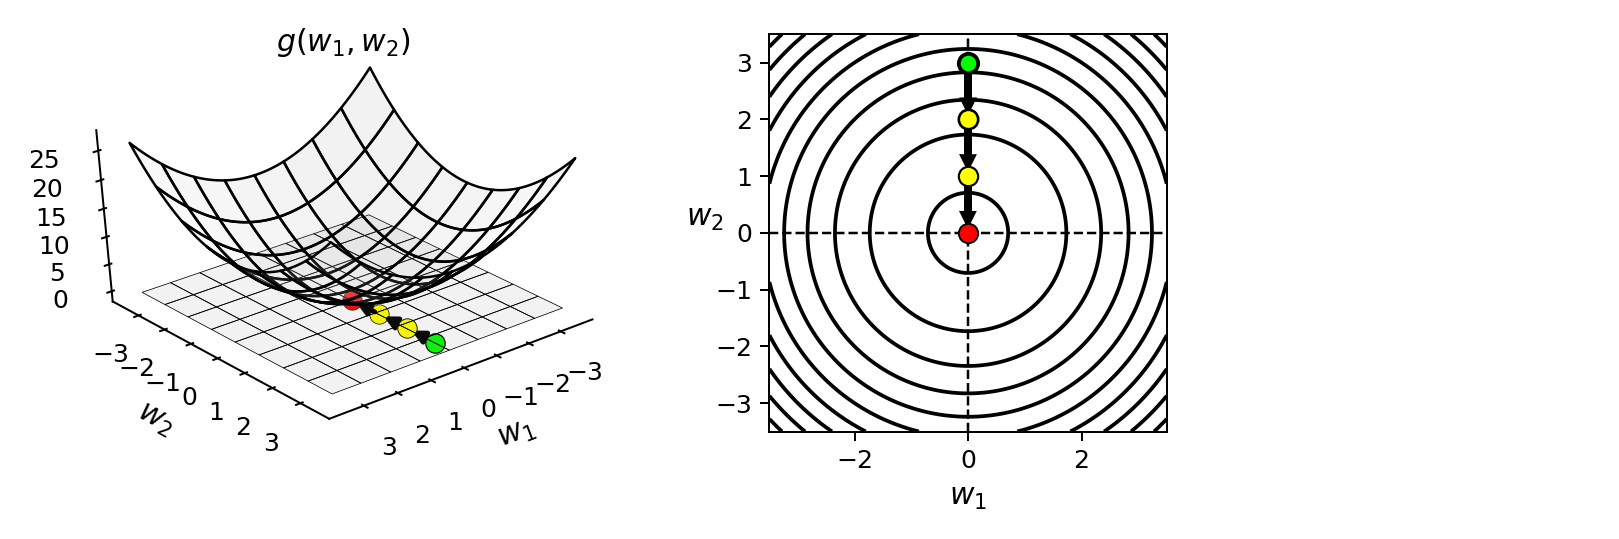

In [4]:
# define function, and points at which to take derivative
g = lambda w: np.dot(w.T,w) + 2
w_init = [0,3]; num_samples = 1000; max_steps = 30;

# animate 2d slope visualizer
view = [40,50]
optlib.random_local_search.visualize3d(func=g,view = view,pt = w_init,max_steps = max_steps, num_samples = num_samples,wmax=max(w_init[0],w_init[1]),axes = True)

#### <span style="color:#a50e3e;">Example 4. </span>  Random local search applied to minimize a simple quadratic

As another example, we minimize the function

$$
g(w_1,w_2) = \text{tanh}(4w_1 + 4w_2) + \text{max}(0.4w_1^2,1) + 1
$$

using random local search again setting $P = 10$ and a maximum of 5 iterations.  Here because an entire region of global minima exist at $g(w_1,w_2) = 1$ the method - as clumsy as it is given the settings - quickly finds a global minimum when initiated at $\mathbf{w}^0 = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$.

<IPython.core.display.Javascript object>


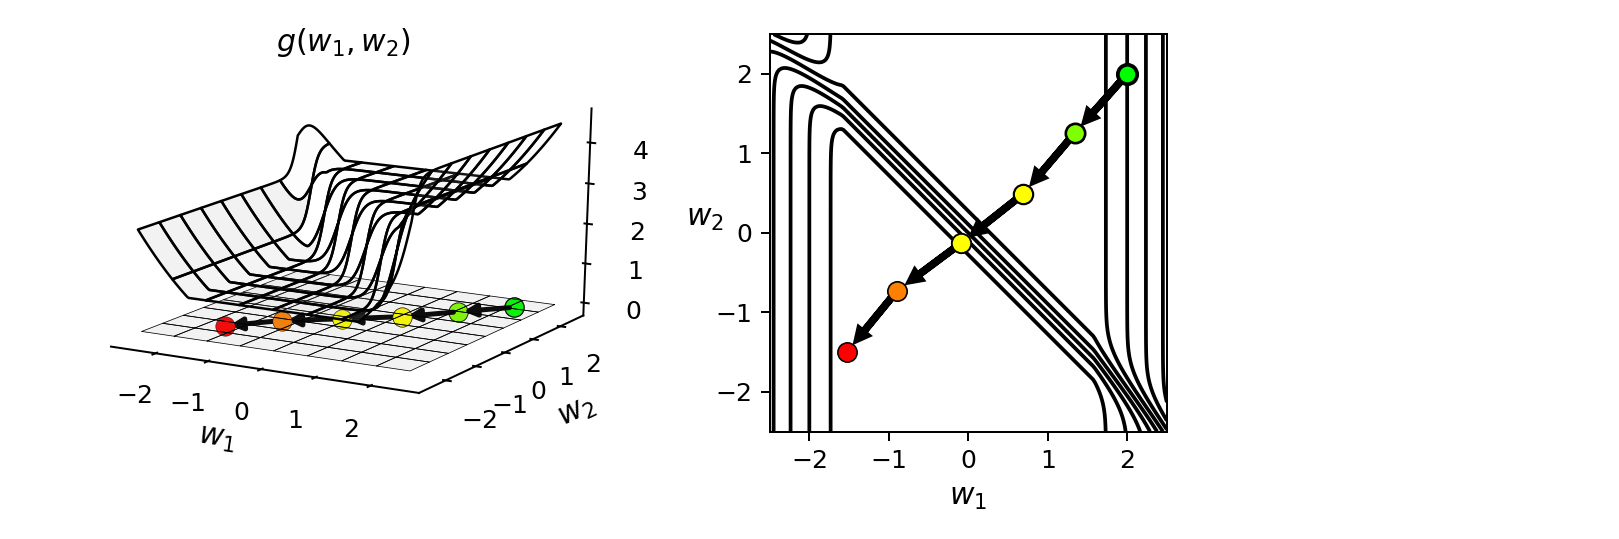

In [5]:
# define function, and points at which to take derivative
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(0.4*w[0]**2,1) + 1
w_init = [2,2]; max_steps = 5; num_samples = 10;

# animate 2d slope visualizer
view = [20,-60]
optlib.random_local_search.visualize3d(func=g,view = view,pt = w_init,max_steps = max_steps, num_samples = num_samples,wmax=max(w_init[0],w_init[1]))

## 3.3  The formal description of local random search

At the first step of the random local search algorithm we move from our initialization $\mathbf{w}^0$ to a new point $\mathbf{w}^1$, in a unit-length descent direction $\mathbf{d}$ from the initial point.  We decide on this direction by sampling random unit-length directions stemming from $\mathbf{w}^0$.  This gives $P$ random points on the unit hypersphere centered at $\mathbf{w}^0$, i.e., the set of points $\mathbf{w}^0 + \mathbf{d}$ where $\Vert \mathbf{d} \Vert_2 = 1$.  In other words, the first step of our random local search algorithm can be thought of as an imperfect computational approach to finding the smallest value of $g\left(\mathbf{w}^0 + \mathbf{d}^{\,}\right)$ over all unit length directions $\mathbf{d}$.  This problem can be stated formally as the constrained optimization problem

\begin{array}
\
\underset{\mathbf{d}}{\text{minimize}}\,\,\,g\left(\mathbf{w}^0 + \mathbf{d}^{\,}\right) \\
  \text{subject to} \,\, \Vert \mathbf{d} \Vert_2 = 1
\end{array}

which we cannot solve 'by hand' in general.  If we could we would derive the optimal decent step for $g$ at $\mathbf{w}^0$ and there would be no need to perform the random sampling, which again is just our attempt to computationally solve this problem.

Likewise at the $k^{th}$ step of the algorithm, we perform the same sort of random search beginning at the point $\mathbf{w}^{k-1}$ - we are searching for the minimum value of $g$ over the unit hypersphere centered here (the set of points $\mathbf{w}^{k-1} + \mathbf{d}^{\,}$ where $\Vert \mathbf{d} \Vert_2 = 1$).  In other words, we can think of this as an approximation to the solution of the constrained problem

\begin{array}
\
\underset{\mathbf{d}}{\text{minimize}}\,\,\,g\left(\mathbf{w}^{k-1} + \mathbf{d}^{\,}\right) \\
  \text{subject to} \,\, \Vert \mathbf{d} \Vert_2 = 1
\end{array}

As with the first step, if we could solve the above problem 'by hand' we would not need to randomly sample directions in search of the one providing greatest descent, we could simply solve the problem to recover the best direction for $g$ at $\mathbf{w}^{k-1}$ directly.

Finally notice how we could turn our perspective around with regards to developing the random local search algorithm.  That is we could have *started* with the formal description of the $k^{th}$ step above.  Having determined that the best descent direction could not be determined by solving the above 'by hand' in general, we could have then stumbled onto the $k^{th}$ step of the random local search algorithm as a way of approximately solving it.

## 3.4  Step length rules

Thus far at each step of the random local search algorithm we search over directions of length one, and so when we take a step to a new point it too must be a distance of one away from its predecessor i.e., we always have that  $\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \mathbf{w}^{k-1} + \mathbf{d} - \mathbf{w}^{k-1} \Vert_2  = \Vert \mathbf{d}  \Vert_2 = 1$.  But it is not always advantages to take steps of this length, as we illustrate in the following example.

#### <span style="color:#a50e3e;">Example 5. </span>  Unit length steps fail to converge to global minimum

Here we re-run the random local search algorithm using the same simple quadratic and algorithm settings as described in Example 3.  However now we initialize at the point $\mathbf{w}^0 = \begin{bmatrix} 1.5 \\ 2 \end{bmatrix}$ which - as can see in the printout generated by the next Python cell - prevents the algorithm from reaching the function's global minimum.

Here the algorithm  - while having reached a low point of the function has not reached the global minimum located at the origin $\begin{bmatrix}0 \\ 0 \end{bmatrix}$ (horizontal and vertical axes have been drawn in dasshed black in the right panel to highlight this point).  The algorithm stopped after taking 4 steps, at the point colored red, because every sampled direction at the $4^{th}$ was an ascent direction.  We visualize this in the right panel by drawing the contour of the quadratic on which the final point lies in dashed red, as well as the unit circle centered at the final point in blue from which directions are sampled in search of a descent direction there.  Notice how every point on the blue unit circle - representing possible search directions - lies on a contour of the quadratic that is greater than or equal to the one on which the final point lies.  Hence very possible direction provides ascent, not descent, and the algorithm halts.

The problem here is that each direction we take must have length one - thus the length of each step must be length one as well.  If we could take *shorter* steps - i.e., steps on a smaller radius than the blue circle shown in the right panel above - we could in fact descend onto lower contours of the quadratic, and get closer to the global minimum.

<IPython.core.display.Javascript object>


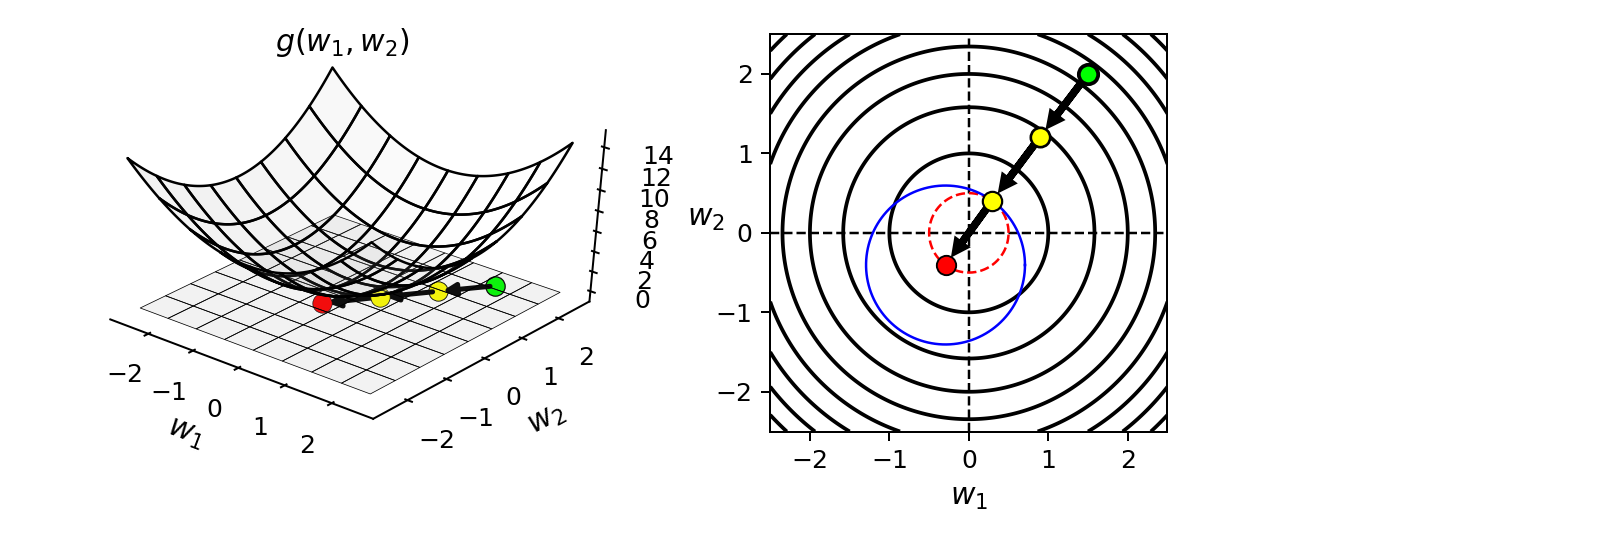

In [6]:
# define function, and points at which to take derivative
g = lambda w: np.dot(w.T,w) + 2
w_init = [1.5,2]; num_samples = 1000; max_steps = 30;

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(func=g,view = view,pt = w_init,max_steps = max_steps, num_samples = num_samples,wmax=max(w_init[0],w_init[1]),plot_final = True,axes = True)

---

We can easily adjust the random local search algorithm so that we can move at each step with whatever length we wish - by introducing a *steplength* parameter.  This is also often referred to as a *learning rate* in the machine learning / deep leearning community.  The steplength paramter - often denoted by the greek letter 'alpha' $\alpha$ - is set to a desired scalar value, and the $k^{th}$ step updated from the unit length step $\mathbf{w}^k = \mathbf{w}^{k-1} + \mathbf{d}^{\,}$ to the more general step

$$
\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha\mathbf{d}^{\,}
$$

The length of this step is now equal to the steplength $\alpha$, as

$$
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \mathbf{w}^{k-1} + \alpha\mathbf{d} - \mathbf{w}^{k-1} \Vert_2  = \Vert \alpha \mathbf{d}  \Vert_2 = \alpha \Vert \mathbf{d}  \Vert_2 = \alpha
$$

Now at the $k^{th}$ step we try out $P$ random directions of length $\alpha$, taking the one that provides the greatest decrease in function value.

Steplengths can be chosen to be fixed and constant for all steps of the algorithm - e.g., we can set $\alpha = 0.1$ for all steps as in the example below - or can be adjusted at each step.  We describe a common instance of the latter idea after the next example.

#### <span style="color:#a50e3e;">Example 6. </span>  A smaller steplength for the previous example

Setting the steplength smaller we can look again at the previous Example above, where the unit steplength was too large, making the algorithm fail to converge to that function's global minimum.  Running the algorithm again with this smaller steplength value the algorithm can indeed converge to the global optimum, as we 

Here we use the same quadratic and algorithm settings as described in the previous example, except we now introduce a steplength and set its value to $\alpha = 0.1$.  Running the algorithm now we can see that it does indeed converge to the global minimum of the function at $\mathbf{w} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

<IPython.core.display.Javascript object>


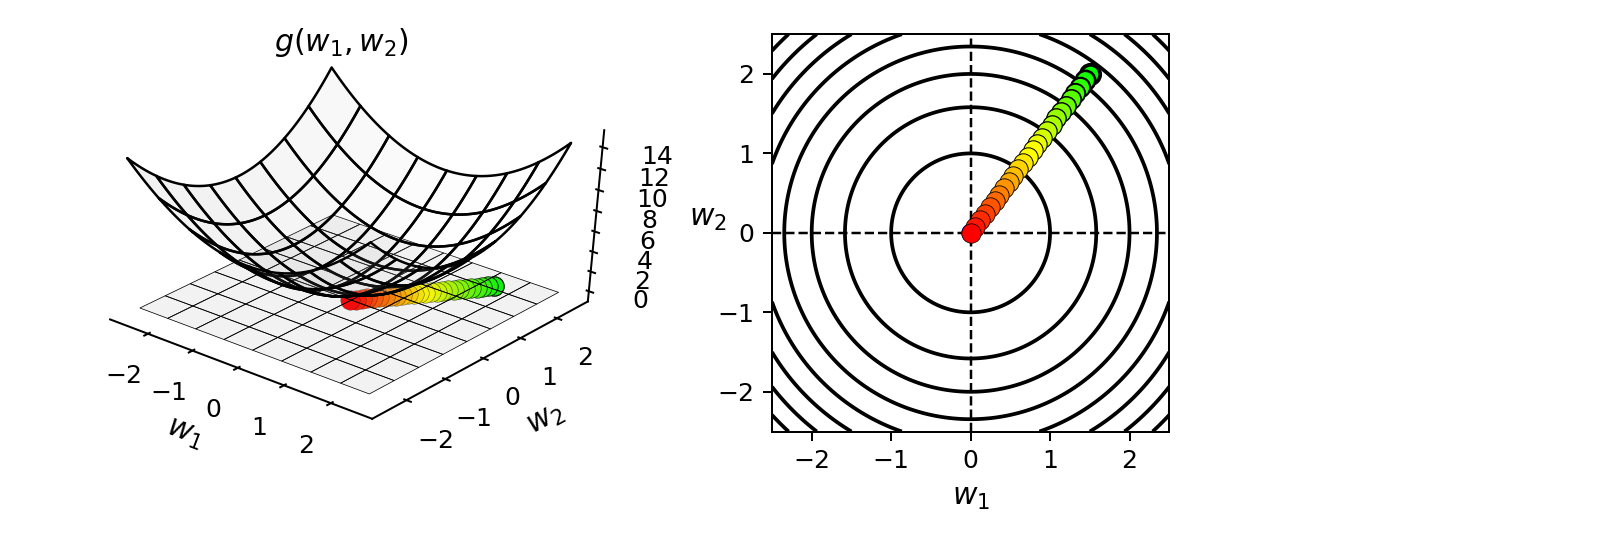

In [7]:
# define function, and points at which to take derivative
g = lambda w: np.dot(w.T,w) + 2
w_init = [1.5,2]; num_samples = 1000; max_steps = 30; steplength = 0.1;

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(func=g,view = view,pt = w_init,max_steps = max_steps, num_samples = num_samples,steplength = steplength,wmax=max(w_init[0],w_init[1]),plot_final = True,axes = True)

Notice however that we need to be careful in choosing the steplength value with this simple quadratic, and by extension any general function.  If - for example - we run the same experiment again but cut the steplength down to $\alpha = 0.07$ we do not reach the global minimum, as shown in the next Python cell.  

<IPython.core.display.Javascript object>


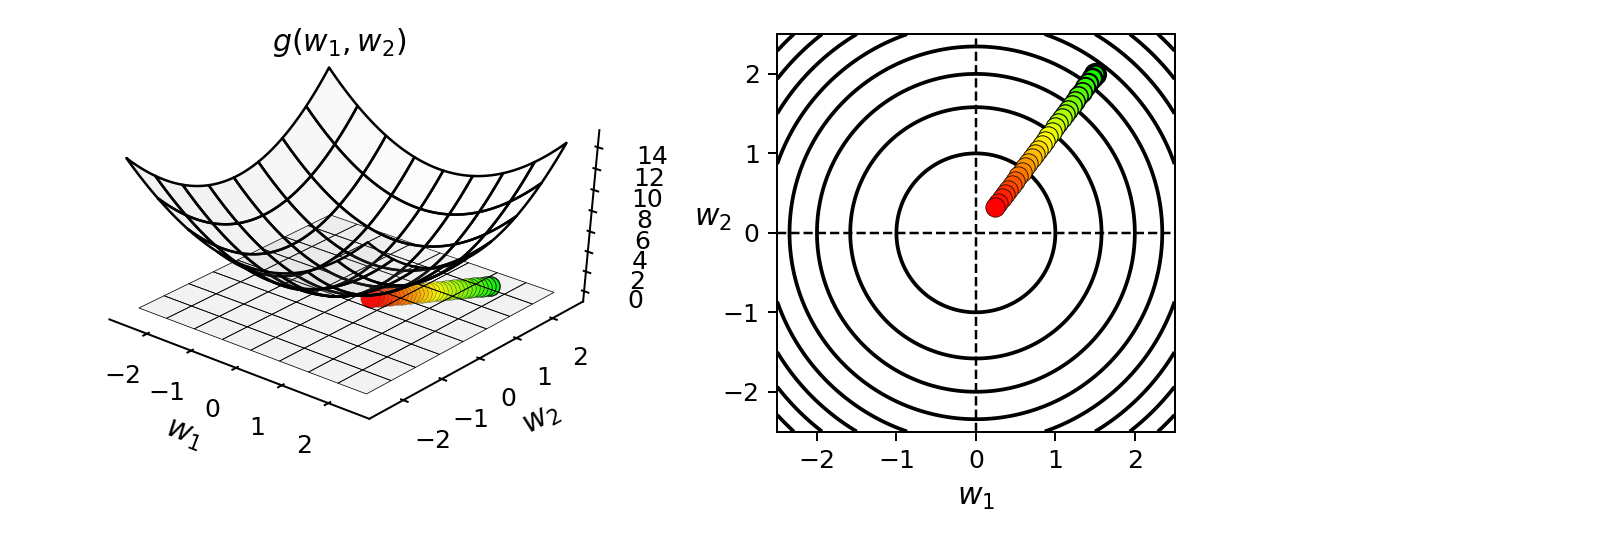

In [8]:
# define function, and points at which to take derivative
g = lambda w: np.dot(w.T,w) + 2
w_init = [1.5,2]; num_samples = 1000; max_steps = 30; steplength = 0.07;

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(func=g,view = view,pt = w_init,max_steps = max_steps, num_samples = num_samples,steplength = steplength,wmax=max(w_init[0],w_init[1]),axes = True)

Thus in general the combination of steplength and maximum number of iterations are best chosen together.  The trade-off here is simple: a small stepsize combined with a large number of steps can guarantee convergence to towards a local minimum, but can be very computationally expensive.  Conversely a large steplength and small number of maximum iterations can - as we saw in Example 6 - be cheaper but less effective at finding small evaluation points.

#### <span style="color:#a50e3e;">Example 7. </span>  Minimizing a function with many local minima using random local search

In this example we show what one may need to do in order to find the global minimum of a function using (normalized) random local search.  For visualization purposes we use the single-input function

$$
g(w) = \text{sin}(3w) + 0.1w^2
$$

we initialize two runs - at $w^0 = 4.5$ and $w^0 = -1.5$.  For both runs we use a steplength of $\alpha = 0.1$ fixed for all 10 iterations.  As can be seen by the result depending on where we initialize we may end up near a local or global minimum - here resulting from the first and second initialization respectively.  Here we illustrate the steps of each run as circles along the input axis with corresponding evaluations on the function itself as a similarly colored 'x'.  The steps of each run are colored green near the start of the run to red when a run halts.

<IPython.core.display.Javascript object>


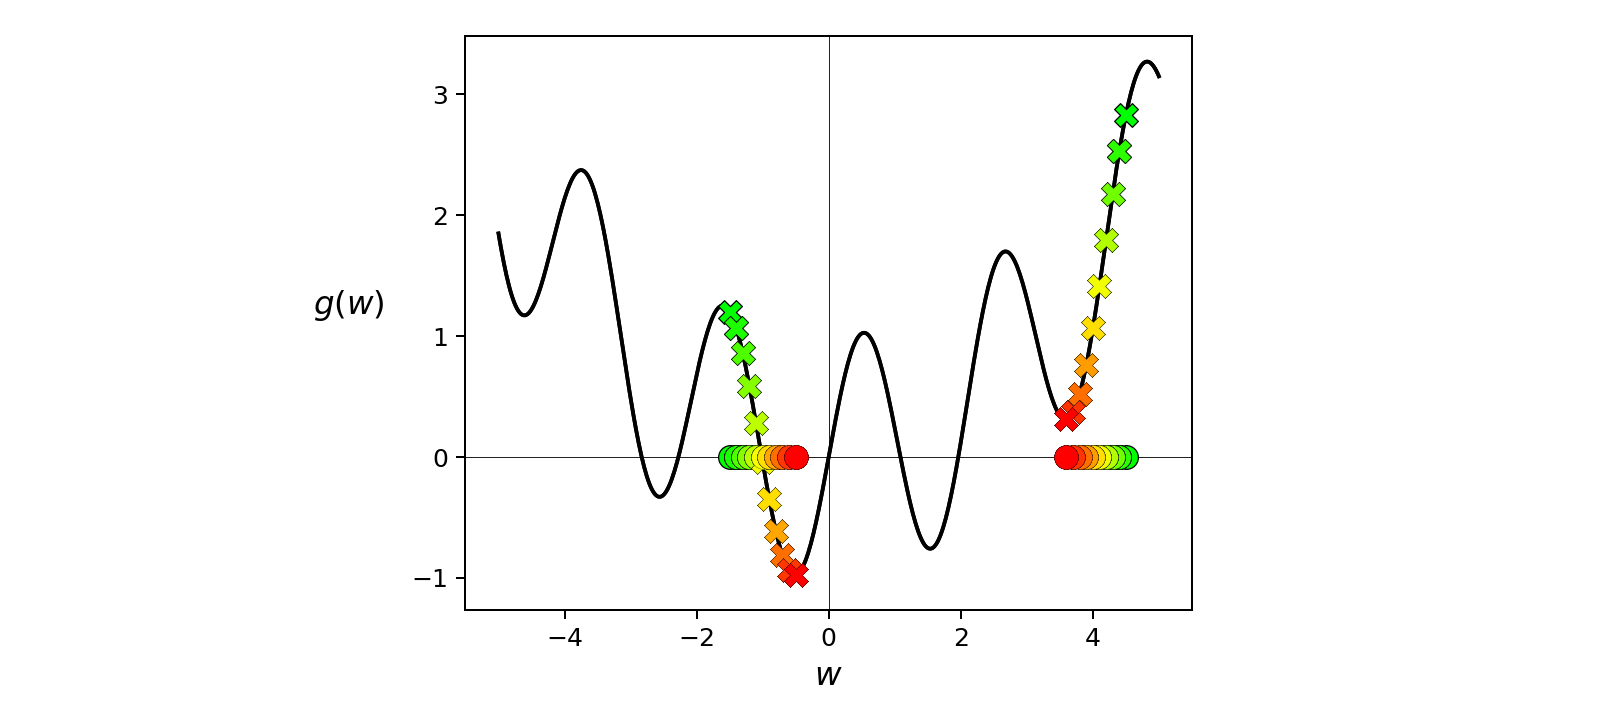

In [10]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(3*w) + 0.1*w**2
w_inits = [4.5,-1.5]; steplength = 0.1; max_steps = 10; num_samples = 10;

# run the visualizer for our chosen input function, initial point, and step length alpha
optlib.random_local_search.draw_2d(g,steplength,max_steps,w_inits,num_samples,wmin = -5,wmax = 5)

---

Another choice we have in choosing steplengths is to change its value at each step.  For more advanced local search algorithms there are a host of ways of doing this, but with a simple method we discuss here there is really only one appropriate general scheme: to diminish the size of the steplength at each step.  This is a safe choice of steplength because it ensures that the algorithm can get into any 'small nooks and crannies' where a function's minima may lie.

A common way of doing this is to set the steplength to $\alpha = \frac{1}{k}$ at the $k^{th}$ step of the process.  If we sum up the total distance the algorithm can then travel in $K$ steps - if it moves at each and every step - the algorithm can travel a distance of

$$
\sum_{k=1}^{K} \Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \sum_{k=1}^{K}\frac{1}{k}
$$

The beauty of this choice of stepsize is that

- clearly the stepsize decreases to zero as $k$ increases i.e., $\alpha = \frac{1}{k} \longrightarrow 0$


- the total distance traveled by the algorithm goes to infinity as $k$ increases i.e., $\sum_{k=1}^{K}\frac{1}{k} \longrightarrow \infty$

The latter condition follows from the fact that $\sum_{k=1}^{\infty}\frac{1}{k} = \infty$ is the class *[harmonic series](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics))*.  Ini theory this  means that an algorithm employing this steplength rule can move around an infinite distance in search of a minimum, and will eventually converge.

#### <span style="color:#a50e3e;">Example 8. </span>  Using a diminishing steplength with the previous example

Here we use the exact same quadratic function and algorithm settings as in Example 6, but employ the diminishing stepsize rule setting $\alpha = \frac{1}{k}$ at the $k^{th}$ step of the process.  With this steplength rule the algorithm converges to a point very near the global minimum of the function.

<IPython.core.display.Javascript object>


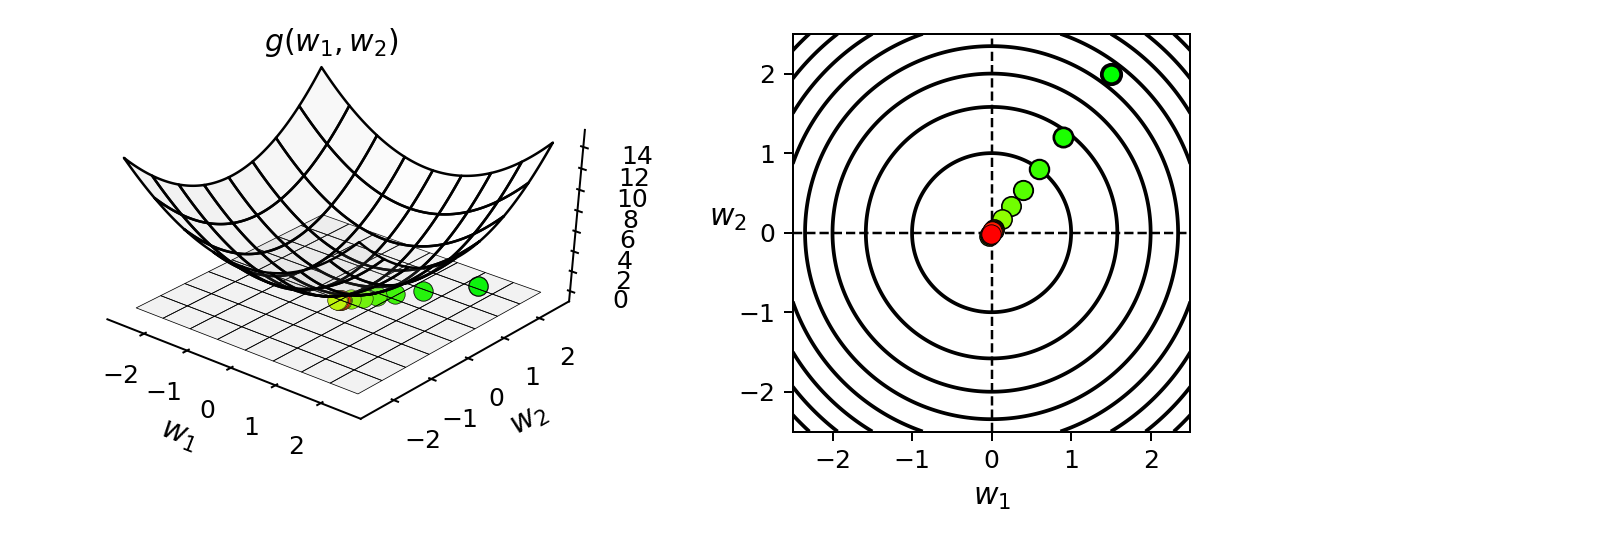

In [9]:
# define function, and points at which to take derivative
g = lambda w: np.dot(w.T,w) + 2
w_init = [1.5,2]; num_samples = 1000; max_steps = 30; steplength = 'diminish';

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(func=g,view = view,pt = w_init,max_steps = max_steps, num_samples = num_samples,steplength = steplength,wmax=max(w_init[0],w_init[1]),axes = True)

Note, however, that while we can technically move an infinite distance to reach a global minimum with this steplength scheme may need to move a very large number of steps depending on where we begin.  Fore xample, if we begin at the point $\mathbf{w} = \begin{bmatrix} 4 \\ 4 \end{bmatrix}$ and use this scheme, we will need to take at least 200 steps to reach the global minimum.  We show the result of this experiment in the cell below.  

<IPython.core.display.Javascript object>


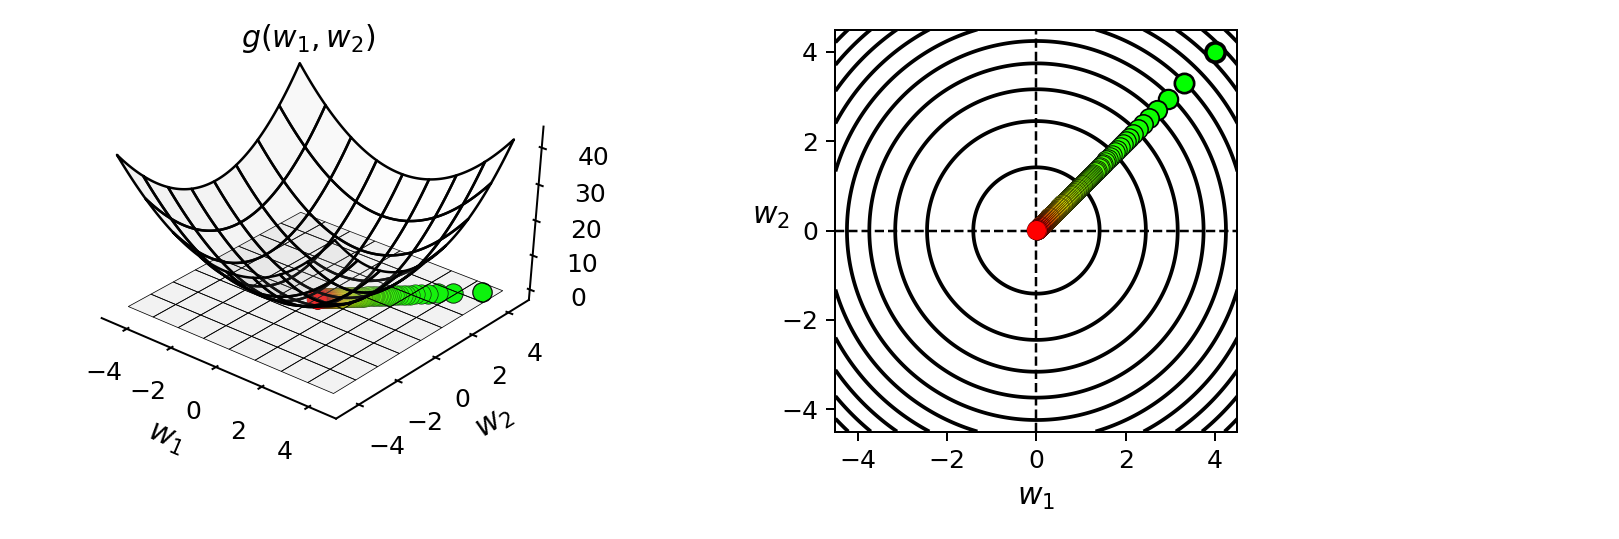

In [10]:
# define function, and points at which to take derivative
g = lambda w: np.dot(w.T,w) + 2
w_init = [4,4]; num_samples = 1000; max_steps = 200; steplength = 'diminish';

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(func=g,view = view,pt = w_init,max_steps = max_steps, num_samples = num_samples,steplength = steplength,wmax=max(w_init[0],w_init[1]),axes = True)

---

Below we re-state the random local search algorithm to include steplength.

### Random local search (with steplength)

<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; **Input:** initial point $\mathbf{w}^0$, maximum number of steps $K$, number of random samples per step $P$, a steplength $\alpha$ or diminishing steplength rule<br>


<strong>2:</strong>&nbsp;&nbsp; <code>for</code> $\,\,k = 1...K$<br>


<strong>3:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>for</code> $p=1...P$ <br>



<strong>4:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>compute</code> random direction $\mathbf{d}^p$, form candidate point $\mathbf{w}^{k-1} + \alpha \mathbf{d}^p$ <br>



<strong>5:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>set</code> $s = \underset{p=1...P}{\text{argmin}}\,\,g\left(\mathbf{w}^{k-1} + \alpha \mathbf{d}^p\right)$, and $\mathbf{d}^{k} = \mathbf{d}^{s}$<br>


<strong>6:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>form</code> new point $\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha\mathbf{d}^k$ <br>


<strong>7:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>if</code> $g\left(\mathbf{w}^k\right) > g\left(\mathbf{w}^{k-1}\right)$  <br>

<strong>8:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **output:** $\mathbf{w}^{k-1}$, <code>break</code><br>



<strong>9:</strong>&nbsp;&nbsp; **output:** $\mathbf{w}^{K}$ <br>

<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>

## 3.5  The curse of dimensionality and random local search

The curse of dimensionality also poses a major obstacle to random direction selection particularly in high-dimensional spaces. We illustrate this through a simple example where we aim to find a descent direction for the simple quadratic function (note however that for a general function the problem we describe here can be even worse)

$$g\left(\mathbf{w}\right)=\mathbf{w}^{T}\mathbf{w}+2$$
starting at the point 

$$\mathbf{w}^{0}=\left[\begin{array}{c}
1\\
0\\
0\\
\vdots\\
0
\end{array}\right]_{ N\times1}$$



When $N=1$, this reduces to finding a descent direction at random for the function $g(w)=w^2$ starting at $w^0=1$, as shown in the figure below. 

Here, starting at $w^0=1$, there are only 2 unit directions we can move in: (i) the negative direction toward the origin shown in yellow, which is a descent direction (as it takes us to the minimum of our quadratic function), or (ii) away from the origin shown in blue, which is indeed an ascent direction (as the function evaluation increases at its endpoint). So in this case, if we decide to choose our direction randomly we will have a $\frac{1}{2}=50\%$ descent probability. Not too bad!  

<p>
<img src= '../../mlrefined_images/math_optimization_images/hypersphere_1d.png' width="75%" height="75%"/>
</p>

Let's see what happens when $N=2$. As you can see in the figure below, starting at $\mathbf{w}^{0}=\left[\begin{array}{cc}
1 \\ 0\end{array}\right]$ (shown by a blue circle) we now have infinitely many unit directions to choose from, where only a fraction of them whose endpoint lie inside the unit circle (centered at origin) are descent directions. Therefore if we were to choose a unit direction randomly, the descent probability would be calculated as the length of the yellow arc in the figure divided by the entire length of the unit circle centered at $\mathbf{w}^{0}$.

$$\text{descent probability}=\frac{\text{length of yellow arc}}{\text{length of unit circle}}$$

For more clarity, the two-dimensional input space is re-drawn from above in the right panel of the figure below.     

<p>
<img src= '../../mlrefined_images/math_optimization_images/hypersphere_2d.png' width="100%" height="150%"/>
</p>

Notice the black circle shown in the right panel, centered at the midpoint of $\mathbf{w}^{0}$ and the origin, completely encompasses the yellow arc, and hence one-half of its length is greater than that of the yellow arc. In other words, the length of the yellow arc is upper-bounded by the length of the black semi-circle that lie inside the unit circle, and we have  

$$\text{descent probability}<\frac{1}{2}\cdot\frac{\text{length of black circle}}{\text{length of unit circle}}$$

Both the numerator and the denominator are now easy to compute, noticing that a simple application of the Pythagorean theorem gives the radius of the black circle as $\frac{\sqrt{3}}{2}$.

$$\text{descent probability}<\frac{1}{2}\cdot\frac{2\pi\left(\frac{\sqrt{3}}{2}\right)}{2\pi\left(1\right)}=\frac{\sqrt{3}}{2}=0.433$$

Therefore in two dimensions, the chance of randomly selecting a descent direction is at most 43%, down 7% from its value in one dimension. 

This rather slight decrease may not seem like a deal breaker at first, but as we travel into larger and larger dimensions we can easily determine that the descent probability shrinks exponentially in $N$. 

This is because in higher dimensions we can still use the same geometric argument we made above to find an upperbound to the descent probability, only this time we are dealing with hyperspheres instead of circles. More specifically, in $N$ we can write  

$$\text{descent probability}<\frac{1}{2}\cdot\frac{\text{surface area of encompassing hypersphere of radius } \frac{\sqrt{3}}{2}}{\text{surface area of unit hypersphere}}=\frac{1}{2}\cdot\left(\frac{\sqrt{3}}{2}\right)^{N-1}$$

So, for instance, when $N=30$ the descent probability falls below 1%. 

#### <span style="color:#a50e3e;">Example 8</span> Confirming the curse of dimensionality experimentally

Here we empirically confirm the curse of dimensionality problem described above for the simple quadratic used there.  In the Python cell below we gradually increase the dimension of the input to this quadratic from $N = 1$ to $N = 25$, and starting at the $N$ dimensional input point $\mathbf{w}^{0}=\left[\begin{array}{cc}
1 \\ 0 \\ \vdots \\ 0\end{array}\right]$ we create $10,000$ random unit directions and evaluate candidate point $\mathbf{w}_{\text{candidate}} = \mathbf{w}^0 - \mathbf{d}$ - where $\mathbf{d}$ is a random unit direction - via the quadratic.

The printout shows what portion of the sampled directions provide a decrease in function evaluation - or in other words what portion of those sampled are descent directions - among the first $100$, $1,000$, and $10,000$ directions sampled.  As we can see from the printout this portion vanishes rapidly to zero as $N$ increass, even when $10,000$ random directions are chosen.

<IPython.core.display.Javascript object>


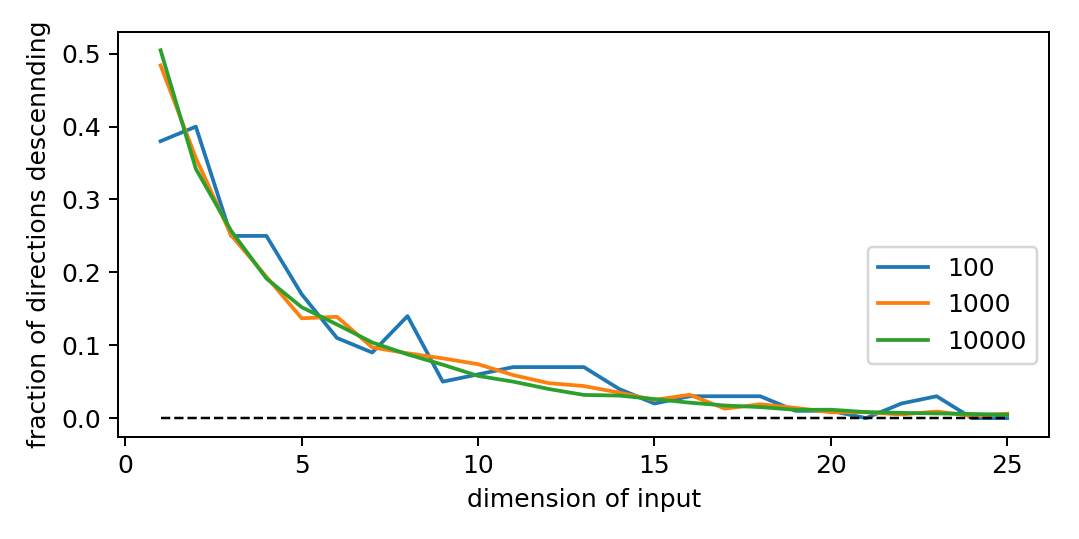

In [13]:
# run experiment for global random evaluation
optlib.random_method_experiments.random_local_experiment()

The true global minimum here is located at $(w_1,w_2) = (0,0)$, which we do not get that close too in the above run.  However if we increase both the number of directions sampled at each step $P$ as well as the number of total iterations we can get closer.  We do this in the next Python cell - increasing $P = 100$ and letting the maximun number of iterations equal 10.

## 3.6 Conclusions

Random local search is a good first mathematical optimizaation algorithm to discuss due to its ease of implementation, reliance on the function alone (and e.g., none of its derivatives), and its value as a prototype for much more useful local methods.  However random local search itself is crippled by the curse of dimensionality, being highly ineffecient for functions with just 30 dimensional input.  Because many modern machine learning cost functions have input dimension $N$  on the order of thousands - to hundreds of millions - it is therefore not practically useful in the context of most machine learning / deep learning problems.

<a id='references'></a>
## References

[1]  Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos. Machine Learning Refined. Cambridge University Press, 2016.